In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
X = iris.data
y = iris.target
print(X.shape, y.shape)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4) (150,)


In [17]:
np.unique(y)

array([0, 1, 2])

In [18]:
test_case = np.where((y==0)|(y==1))
X= X[test_case][:,[0,2]]
y = y[test_case]
print(np.unique(y))

In [23]:
setosas = X[np.where(y==0)]
versicolors = X[np.where(y==1)]

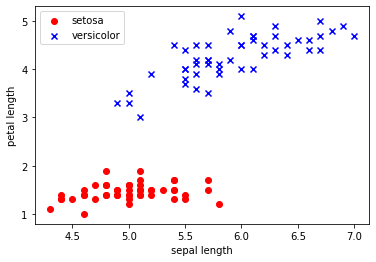

In [32]:
plt.scatter(setosas[:,0], setosas[:,1], color='r',marker='o', label='setosa')
plt.scatter(versicolors[:,0], versicolors[:,1], color='b',marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()
plt.show();

In [27]:
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.25, shuffle=True)
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(75, 2) (75,)
(25, 2) (25,)


In [33]:
import sys
class Perceptron(object):
  """Perceptron classifier.
    
    Parameters
    ------------
    eta: float 
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Number of epochs, i.e., passes over the training dataset.
        
    Attributes
    ------------
    w_: 1d-array
        Weights after fitting.
    errors_: list
        Number of misclassifications in every epoch.
    random_state : int
        The seed of the pseudo random number generator.
  """
  def __init__(self, input_dim):
    """
        instantiate a new Perceptron

        :param learning_rate: coefficient used to tune the model
        response to training data
    """
    self.weights = np.random.normal(loc=0.0, scale=1.0, size=input_dim)
    self.bias = np.random.normal(loc=0.0, scale=1.0, size=1)

  def activation(self, pred):
    """Using Binary Step Activation function"""
    return np.where(pred >= 0, 1, 0)

  def predict(self, data):
    """Return class label after unit step"""

    return self.activation(np.dot(data, self.weights.T))

  def accuracy(self, features, targets):
    """Check the accuracy of the predictied features"""
    predictions = self.predict(features)
    return (predictions == targets).mean()


  def train(self, xtrain, ytrain, xtest, ytest, epochs, lr=0.01):
    """Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values, or labels.

        Returns
        -------
        self : object

    """
    losses = []
    train_accuracies = []
    test_accuracies = []
    for e in range(1, epochs + 1):
      epoch_loss = 0
      predictions = []
      for data, target in zip(xtrain, ytrain): 
        # Weight updation
        pred = self.predict(data)
        error = target - pred  # Calculating the error
        update = lr * error  
        epoch_loss += error ** 2 
        self.weights += update * data # updating the weights 
        self.bias += update # updating the Bias
        
      train_acc = self.accuracy(xtrain, ytrain)
      test_acc = self.accuracy(xtest, ytest)

      train_accuracies.append(train_acc)
      test_accuracies.append(test_acc)

      losses.append(epoch_loss)

      print(f"\rEpoch {e}/{epochs}, Loss : {epoch_loss}, Train Acc : {train_acc}, Test Acc : {test_acc}", end="")
      sys.stdout.flush()
      # clearing the Screen after every epochs
    return {'losses': losses, 'train_acc': train_accuracies, 'test_acc': test_accuracies}

In [34]:
obj = Perceptron(input_dim=2)
history = obj.train(Xtrain,ytrain, Xtest, ytest, epochs=350, lr=0.001)

Epoch 350/350, Loss : 0, Train Acc : 1.0, Test Acc : 1.0

In [30]:
print(obj.weights,obj.bias)

[-0.00531366  0.00955285] [-1.71176403]


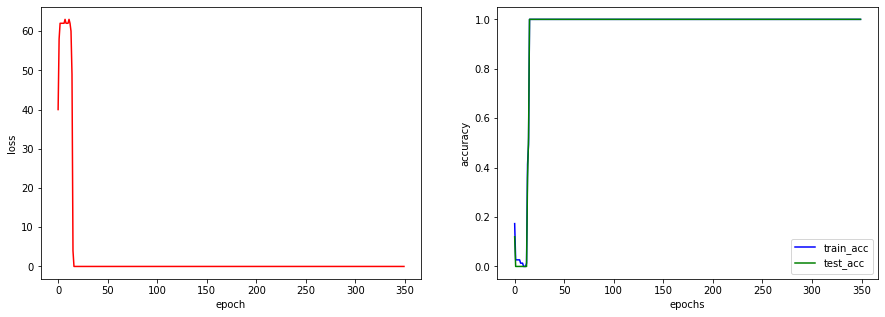

In [35]:
fig = plt.figure(figsize=[15,5])

ax1 = fig.add_subplot(121)
ax1.plot(history['losses'], c='r')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

ax2 = fig.add_subplot(122)
ax2.plot(history['train_acc'], c='b', label='train_acc')
ax2.plot(history['test_acc'], c='g', label='test_acc')
ax2.legend()
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
plt.show();